# Leader board

Check out the latest challenge results here!

:::{tip}

Be sure to refresh the page to get the latest results.
:::

## Top 10 teams

Check out the evolution of the leading teams's progress!

In [1]:
# Rules of the game
MAX_GATES = 150
MAX_PARAMS = 60

# Leaderboard config
NUM_LEADERS = 10

# Helper function to compute total submission score
def compute_score(entry):
    # Accuracy 
    score = entry.Accuracy

    # Gate penalty
    score += 5 * (MAX_GATES - entry.Gates) / MAX_GATES

    # Params penalty
    score += 5 * (MAX_PARAMS - entry.Parameters) / MAX_PARAMS
    return score

/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/hostedtoolcache/Python/3.11.9/x64/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49296 (\N{HANGUL SYLLABLE BBI}) missing from font(s) DejaVu Sans.
  func(*

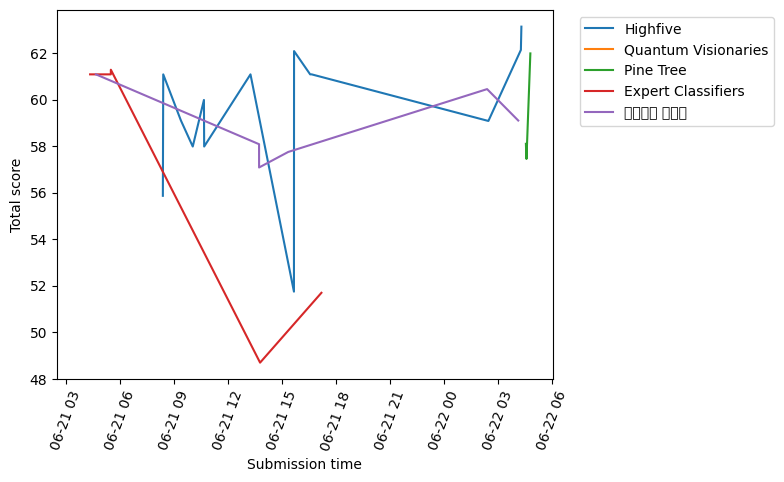

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve submissions and compute total score
results = pd.read_csv("results.csv", index_col=False)
results["Timestamp"] = pd.to_datetime(results.Timestamp, unit="s")
results.insert(1, "Score", results.apply(compute_score, axis=1))

# Get top teams, sorted by their highest scoring submission
gpby = results.groupby("Team")
top_teams = results.iloc[gpby.idxmax().Score].sort_values("Score", ascending=False)
leaders = top_teams[:NUM_LEADERS].reset_index(drop=True)

# Extract leading teams' data
agg = gpby.agg(list)
plt.xticks(rotation=70)
[plt.plot(agg.loc[team].Timestamp, agg.loc[team].Score) for team in leaders.Team]

# Make the plot pretty
plt.xlabel("Submission time")
plt.ylabel("Total score")
plt.legend(leaders.Team, bbox_to_anchor=(1.04, 1), loc="upper left");

In [3]:
leaders.rename(columns={"Score": "Top Score"})

,Team,Top Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Highfive,63.133333,f5b6df,2024-06-22 04:19:19,54.0,6,8
1,Quantum Visionaries,62.083333,00ce1d,2024-06-21 03:45:55,54.0,10,19
2,Pine Tree,61.983333,77c6f5,2024-06-22 04:49:12,53.0,8,9
3,Expert Classifiers,61.283333,9b7ce8,2024-06-21 05:30:36,53.0,14,15
4,소나무가 삐지면,61.083333,9f0161,2024-06-21 04:40:52,53.0,10,19


## Submission history

Please find all the challenge submissions below. Most recent submissions are at the top!

In [4]:
results.sort_values("Timestamp", ascending=False).reset_index(drop=True)

,Team,Score,Commit,Timestamp,Accuracy,Gates,Parameters
0,Pine Tree,61.983333,77c6f5,2024-06-22 04:49:12,53.0,8,9
1,Pine Tree,57.450000,e5ac08,2024-06-22 04:36:15,49.0,9,15
2,Pine Tree,58.100000,a29225,2024-06-22 04:34:20,49.0,7,8
3,Highfive,63.133333,f5b6df,2024-06-22 04:19:19,54.0,6,8
4,Highfive,62.133333,0eb4cc,2024-06-22 04:17:37,53.0,6,8
5,소나무가 삐지면,59.100000,9647ce,2024-06-22 04:08:49,50.0,7,8
6,Highfive,59.083333,691e74,2024-06-22 02:29:22,50.0,5,9
7,Highfive,59.083333,1f7431,2024-06-22 02:28:38,50.0,5,9
8,소나무가 삐지면,60.450000,d1b18b,2024-06-22 02:24:58,52.0,9,15
9,Expert Classifiers,51.700000,480933,2024-06-21 17:12:36,44.0,19,20
